In [2]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

In [3]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty
sensei
/opt/jupyterhub/bin/python3
3.8.5 (default, Jan 27 2021, 15:41:15) 
[GCC 9.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


# Lesson 21 -- Prediction Engines (Data Modeling by Regression - Continued)

A procedure to use additional variables to make predictions.  OLS is not confined to a single explainatory variable; we can consider a collection of explainatory variables.

## Objectives
- To apply fundamental concepts involved in data modeling and regression;
  - Is a single variable a good estimator of the target process?
  - What kind of 'error' is involved
---

## Computational Thinking Concepts
The CT concepts include:

- Abstraction => Represent data behavior with a model
- Pattern Recognition => Compare patterns in (our) data models to make a decision
---

# Textbook Resources

[https://inferentialthinking.com/chapters/15/Prediction.html](https://inferentialthinking.com/chapters/15/Prediction.html)

You know the URL that no-one reads, perhaps because there is a "secret" module you need to install, without instructions of how! 

<hr>


## Marksmanship Example

As an example consider our work on a FPS game named "Olympic 10-meter Air Pistol" we are developing as a training tool. [https://en.wikipedia.org/wiki/ISSF_10_meter_air_pistol](https://en.wikipedia.org/wiki/ISSF_10_meter_air_pistol)

First some packages

In [1]:
import random
import numpy
import matplotlib.pyplot

So first we are going to build a function that shows a target, with strikes on the target.

In [2]:
def showmytarget(myx,myy,centerx,centery):
#    import matplotlib.pyplot as plt
    fig, ax = matplotlib.pyplot.subplots(figsize = (10,10)) # note we must use plt.subplots, not plt.subplot
    circle1 = matplotlib.pyplot.Circle((centerx, centery), 1, color='black')
    circle2 = matplotlib.pyplot.Circle((centerx, centery), 1, color='orange', fill=False)
    circle3 = matplotlib.pyplot.Circle((centerx, centery), 0.5, color='orange', fill=False)
    circle4 = matplotlib.pyplot.Circle((centerx, centery), 2, color='black', fill=False)
    circle5 = matplotlib.pyplot.Circle((centerx, centery), 3, color='black', fill=False)
    circle6 = matplotlib.pyplot.Circle((centerx, centery), 4, color='black', fill=False)
    circle7 = matplotlib.pyplot.Circle((centerx, centery), 5, color='black', fill=False)
    circle8 = matplotlib.pyplot.Circle((centerx, centery), 6, color='black', fill=False)
    ax.set_xlim((-10, 10))
    ax.set_ylim((-10, 10))
    ax.plot(myx,myy, 'o', color='r') #vector of hits
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)
    ax.add_artist(circle4)
    ax.add_artist(circle5)
    ax.add_artist(circle6)
    ax.add_artist(circle7)
    ax.add_artist(circle8)
    matplotlib.pyplot.show()
    return

### Accuracy

The concept of accuracy is a measure of how close to the "true" or population value is our estimate.  
If we are estimating the mean value, then the "bullseye" is the population mean $\mu$, our estimate is $\bar x$.

Consider the graphical simulator below.  The target is centered at (0,0).  We will take 10 shots and evaluate our performance, lets say that we are kind of old and shaky, sometimes we hit the bullseye, sometimes we don't but in 40 years of shooting, on average, we get good scores and tend to hit near the center.

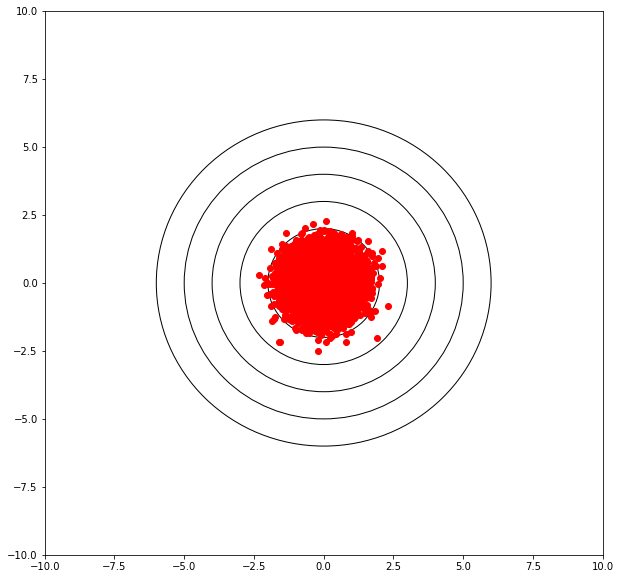

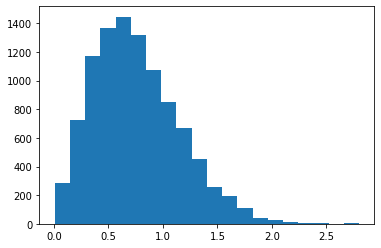

mean distance from bullseye = 0.7563474981564366


In [3]:
mu = 0.0 # where we tend to hit 
sigma = 0.60 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(10001): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))

# Aiming Point

Consider the graphical simulator below. The target is centered at (0,0). We will take 10 shots and evaluate our performance, lets say that we are kind of sloppy and shaky, sometimes we hit the bullseye, sometimes we don't but in 40 years of shooting, on average, we get ok scores -- in this case our mean value deviates from zero, say a bit left and low.

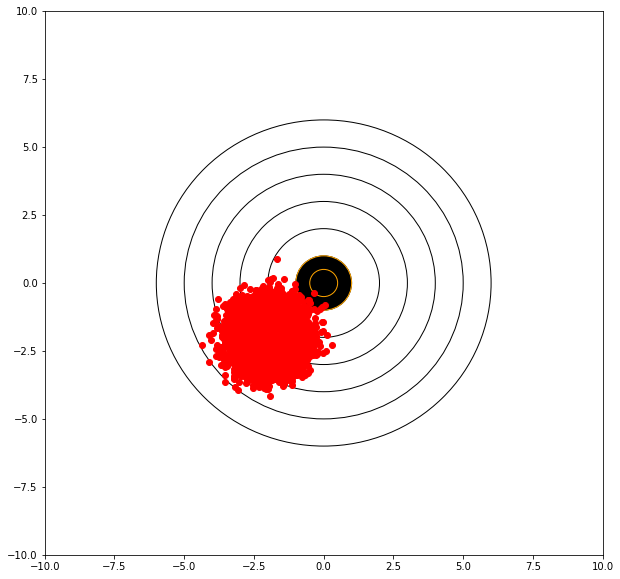

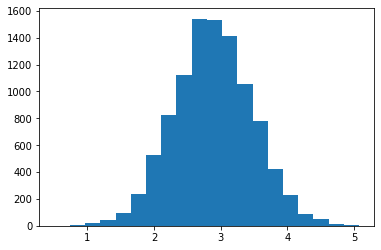

mean distance from bullseye = 2.883687031641119


In [4]:
mu = -2.0 # where we tend to hit 
sigma = 0.6 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(10001): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))

### Precision

The concept of precision is a measure of the repeatability of our estimates.  In this context the dispersion is the metric, i.e. variance.  Consider the graphical simulator below. The target is centered at (0,0). We will take 10 shots and evaluate our performance, lets say that we are kind of sloppy but very steady, all our shots are quite close, and it really depends on how we set up our sights.

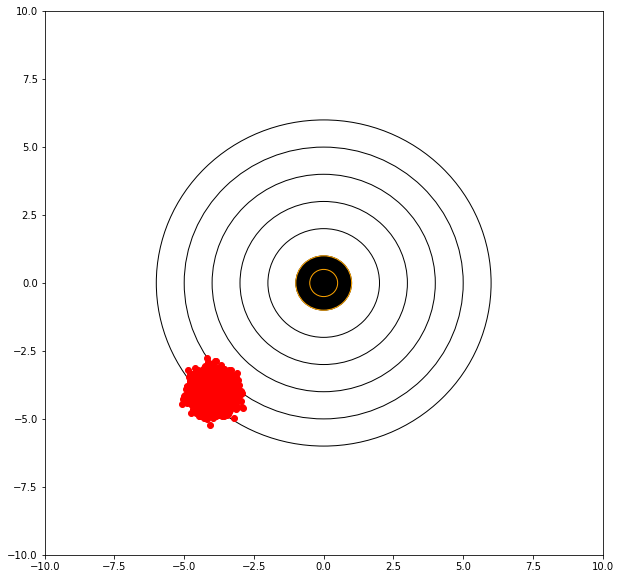

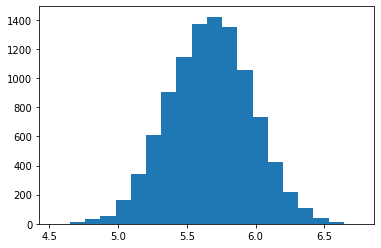

mean distance from bullseye = 5.669841002879551


In [5]:
mu = -4.0 # where we tend to hit 
sigma = 0.3 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(10001): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))

If we can adjust our sights to hit a bit high and right (of the red dots) then we anticipate a better score.


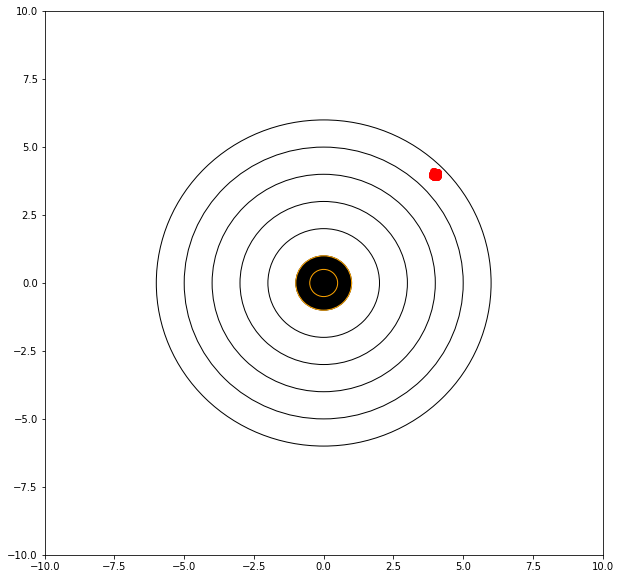

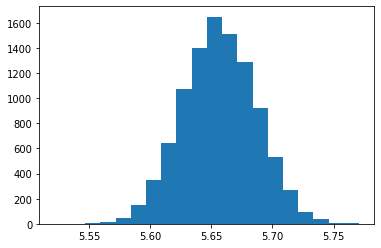

mean distance from bullseye = 5.656575335302446


In [6]:
mu = 4.00 # where we tend to hit 
sigma = 0.03 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(10001): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))

### Bias

Bias is a systematic "error" or offset - similar to the distance from the bullseye in our examples.  If we have a precise rifle that shoots a known distance from the bullseye, thats still a useful tool - we either adjust our aiming point, or the device to account for this bias.  Its akin to the last example where we demonstrate the contribution to error from a poor point of aim, and an unsteady hand.

## Residuals

In the context of our target shooting, the residual is the distance from the target that our model (the rifle) places the estimate (shot).  Lets examine the simulations over again.  First with a bias and unsteady hands

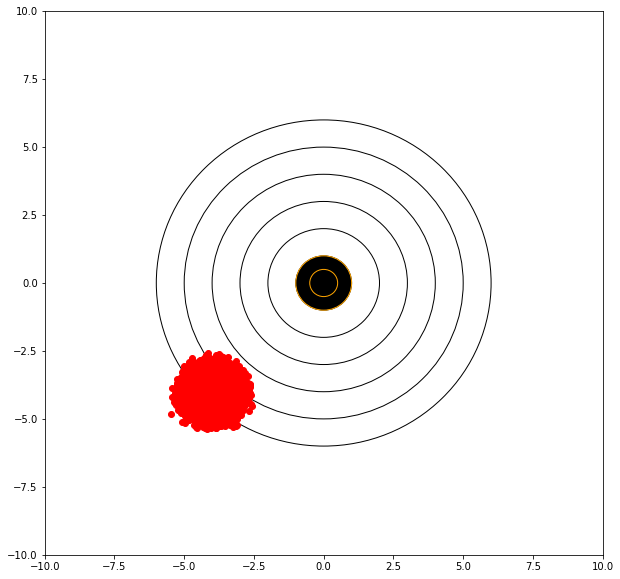

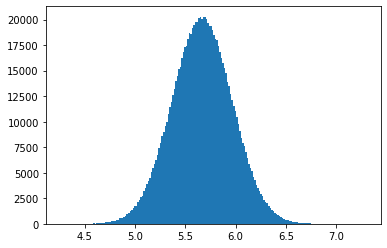

mean distance from bullseye = 5.665232858532361


In [7]:
mu = -4.0 # where we tend to hit 
sigma = 0.3 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(1000001): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=200)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))

In these examples we know the target should be at (0,0) so lets stipulate that to our model (rifle).

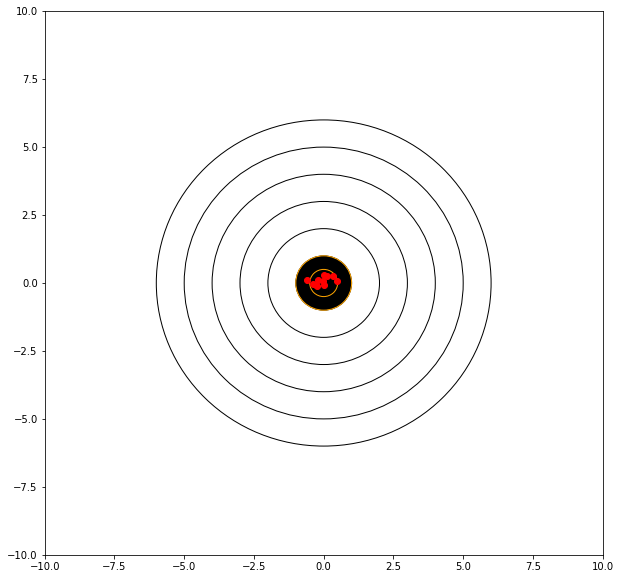

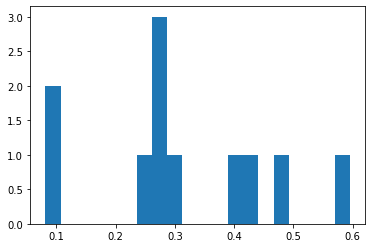

mean distance from bullseye = 0.31280290006908007
mean dispersion from point of aim = 0.14944218244037039


In [8]:
mu = 0.0 # where we tend to hit 
sigma = 0.3 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(11): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))
print('mean dispersion from point of aim =',numpy.std(distxy))

So even with a perfect aim because of shaky hands, our average distance from the target is 0.37, and dispersion from the point of aim is 0.196.

Now lets improve our situatuon by putting our device into a mechanical mount that reduces the shake.

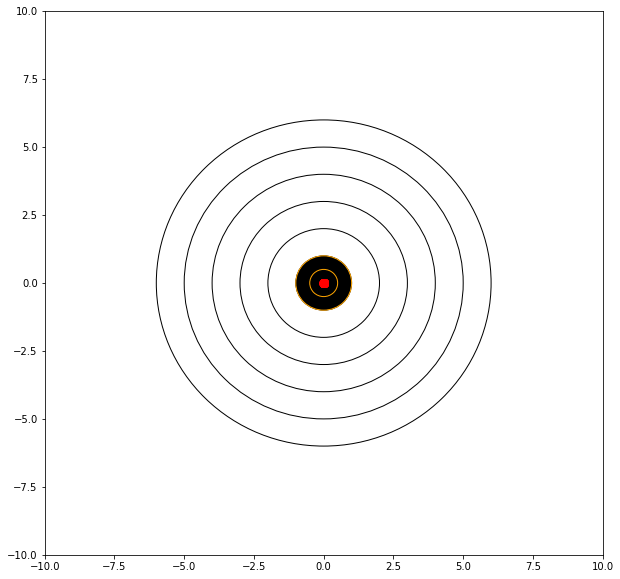

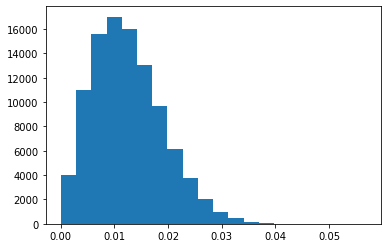

mean distance from bullseye = 0.01251146023276034
mean dispersion from point of aim = 0.006526392033196435


In [9]:
mu = 0.0 # where we tend to hit 
sigma = 0.01 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(100001): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))
print('mean dispersion from point of aim =',numpy.std(distxy))

Now with perfect aim and a rigid mount, our average distance from the target is 0.00125, and the dispersion is 0.006.

A technique you will learn in your statistics class called analysis of variance is a practical application of these ideas.  The distances (in this case always positive) are the residuals, and the variance has two contributing components; how far from the true value the estimator is (our bullseye distance); and how spread out around the point of aim the estimates are (sample variance).

What adds to the challenge is that the target often moves!

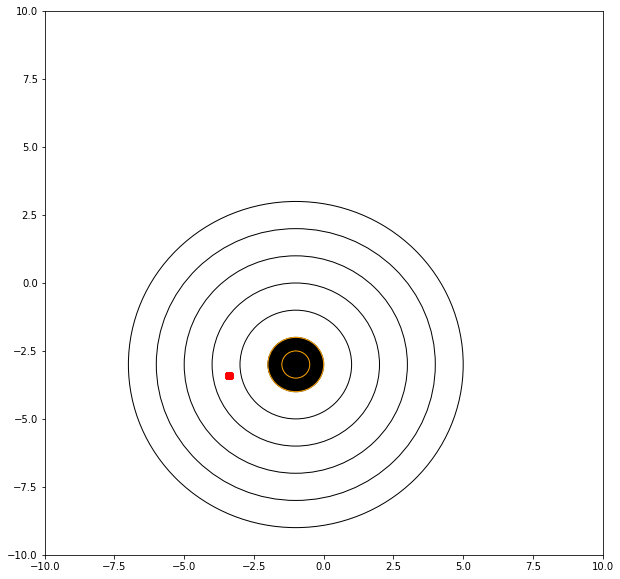

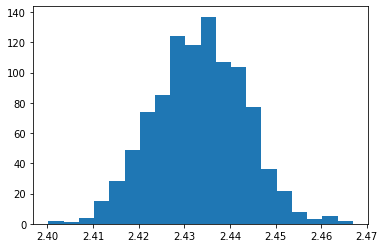

mean distance from bullseye = 2.4333561130521044
mean dispersion from point of aim = 0.009995464892792957


In [10]:
mu = -3.40 # where we tend to hit 
sigma = 0.01 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(1001): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append(((xvalue+1)**2 + (yvalue+3)**2)**0.5)
showmytarget(myx,myy,-1,-3)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))
print('mean dispersion from point of aim =',numpy.std(distxy))

### MLS Regression (Continued)

### Example

It is desired to relate the abrasion resistance of rubber (y) to the amount of silica filler ($x_1$) and the amount of hardner ($x_2$).  
Fine-particle silica fibers are added to rubber to increase strength and abrasion resistance. 
The hardner chemically bondos the filler to the rubber polymer chains and increases the efficiency of the filler.
The units of measure are in parts per hundred of rubber ($pph_r$)

The data from an experiment are given below 

|Y|$x_1$|$x_2$|
|:---|:---|:---|
|83|1|-1|
|113|1|1|
|92|-1|1|
|82|-1|-1|
|100|0|0|
|96|0|0|
|98|0|0|
|95|0|1.5|
|80|0|-1.5|
|100|1.5|0|
|92|-1.5|0|


Lets examine some different models and assess their utility to explain these data.

2. $Y = \beta_0 +\beta_1 x_1 + \beta_2 x_2 $
2. $Y = \beta_0 +\beta_1 x_1 + \beta_2 x_2 +\beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2$

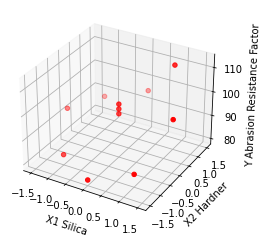

In [18]:
# The experimental data
y = [83,113,92,82,100,96,98,95,80,100,92]
x1 = [1,1,-1,-1,0,0,0,0,0,1.5,-1.5]
x2 = [-1,1,1,-1,0,0,0,1.5,-1.5,0,0]
x1x1 = []; x2x2 = []; x1x2 = []
for i in range(len(y)):
    x1x1.append(x1[i]*x1[i])
    x2x2.append(x2[i]*x2[i])
    x1x2.append(x1[i]*x2[i])

# This import registers the 3D projection, but is otherwise unused.
# https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, color='r')

ax.set_xlabel('X1 Silica')
ax.set_ylabel('X2 Hardner')
ax.set_zlabel('Y Abrasion Resistance Factor')

plt.show()

In [19]:
import numpy as np
import statsmodels.api as sm

x = [x1]

ones = np.ones(len(x[0]))
X = sm.add_constant(np.column_stack((x[0], ones)))
for ele in x[1:]:
    X = sm.add_constant(np.column_stack((ele, X)))
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.557
Date:                Thu, 08 Apr 2021   Prob (F-statistic):              0.244
Time:                        17:02:32   Log-Likelihood:                -39.089
No. Observations:                  11   AIC:                             82.18
Df Residuals:                       9   BIC:                             82.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.0000      3.206      1.248      0.2

/opt/jupyterhub/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [20]:
xm1 = []; xm2 = []
howmany = 11
xstep = (1.5 - (-1.5))/howmany
for i in range(howmany+1):
    for j in range(howmany+1): 
        xm1.append(i*xstep-1.5)  #note i and j to build a grid
        xm2.append(j*xstep-1.5)

xx = [xm2,xm1]


ones = np.ones(len(xx[0]))
XX = sm.add_constant(np.column_stack((xx[0], ones)))
for ele in xx[1:]:
    XX = sm.add_constant(np.column_stack((ele, XX)))
yy = results.predict(XX)

ValueError: shapes (144,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

NameError: name 'yy' is not defined

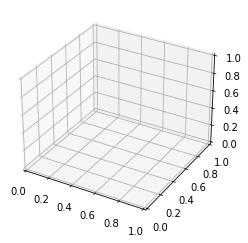

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xm1, xm2, yy, color='r')

ax.set_xlabel('X1 Silica')
ax.set_ylabel('X2 Hardner')
ax.set_zlabel('Y Abrasion Resistance Factor')

plt.show()

In [34]:
x = [x1,x2,x1x1,x2x2,x1x2]

ones = np.ones(len(x[0]))
X = sm.add_constant(np.column_stack((x[0], ones)))
for ele in x[1:]:
    X = sm.add_constant(np.column_stack((ele, X)))
results = sm.OLS(y, X).fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     10.83
Date:                Tue, 10 Nov 2020   Prob (F-statistic):             0.0103
Time:                        13:48:52   Log-Likelihood:                -26.378
No. Observations:                  11   AIC:                             64.76
Df Residuals:                       5   BIC:                             67.14
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.0000      1.974      2.533      0.0

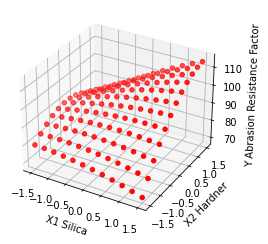

In [36]:
xm1 = []; xm2 = [];xxm1 = []; xxm2 = []; xxm12 = []
howmany = 11
xstep = (1.5 - (-1.5))/howmany
for i in range(howmany+1):
    for j in range(howmany+1): 
        xm1.append(i*xstep-1.5)  #note i and j to build a grid
        xm2.append(j*xstep-1.5)
        xxm1.append((i*xstep-1.5)**2)
        xxm2.append((j*xstep-1.5)**2)
        xxm12.append((i*xstep-1.5)*(j*xstep-1.5))

xx = [xm1,xm2,xxm1,xxm2,xxm12]


ones = np.ones(len(xx[0]))
XX = sm.add_constant(np.column_stack((xx[0], ones)))
for ele in xx[1:]:
    XX = sm.add_constant(np.column_stack((ele, XX)))
yy = results.predict(XX)
yy = results.predict(XX)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xm1, xm2, yy, color='r')

ax.set_xlabel('X1 Silica')
ax.set_ylabel('X2 Hardner')
ax.set_zlabel('Y Abrasion Resistance Factor')

plt.show()

## Learn More

- https://euanrussano.github.io/20190810linearRegressionNumpy/
- http://scipy-lectures.org/packages/statistics/auto_examples/plot_regression_3d.html
- https://www.geeksforgeeks.org/ml-multiple-linear-regression-using-python/

## Code Fragments for Future Development

In [ ]:
### Lets Make a Plotting Package
def makeAbear(xxx,yyy,xmodel,ymodel):
    myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio
# Built the plot
    matplotlib.pyplot.scatter(xxx, yyy,  color ='blue') 
    matplotlib.pyplot.plot(xmodel, ymodel,  color ='red') 
    matplotlib.pyplot.ylabel("Y") 
    matplotlib.pyplot.xlabel("X") 
    mytitle = "YYY versus XXX"
    matplotlib.pyplot.title(mytitle) 
    matplotlib.pyplot.show()
    return